In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [31]:
# стаж преподавателя, стоимость урока
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

# полученный балл ЕГЭ
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [94]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [95]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
# стандартизируем 2-й и 3-й признаки с изменением типа на float
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [6]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [7]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [1.2138283  0.94802748 0.32665191 2.09505932], error 3320.472359805036
Iter: 500, weights: [22.90320343  5.12621228 -7.04881497 19.36753023], error 40.4546432985403
Iter: 1000, weights: [27.39674569  5.92837677 -6.01386534 16.82353596], error 33.982831979220066
Iter: 1500, weights: [30.49088944  6.02787509 -4.84303311 15.05703046], error 30.58197776462747
Iter: 2000, weights: [32.70033796  6.05180169 -3.95929384 13.79407707], error 28.637023180535607
Iter: 2500, weights: [34.2862581   6.0642476  -3.3201705  12.88738745], error 27.492392460335388
Iter: 3000, weights: [35.42543956  6.07271563 -2.8606046  12.23608831], error 26.800118649774912
Iter: 3500, weights: [36.24380663  6.07875182 -2.53041325 11.76820542], error 26.369862504734602
Iter: 4000, weights: [36.83171472  6.08308348 -2.29320178 11.43208209], error 26.09537943731932
Iter: 4500, weights: [37.25406382  6.08619484 -2.12279023 11.1906134 ], error 25.916054176896505
Final MSE: 25.796446219071775


reg (lambda)=0.0
Iter: 0, weights: [0.04129159 0.66692523 1.62645421 2.16794763], error 3426.7048404078137
Iter: 500, weights: [22.73333545  5.14220569 -7.17992091 19.50826348], error 40.7436628407505
Iter: 1000, weights: [27.68328365  6.08946879 -6.10422549 16.70795301], error 33.68853298171241
Iter: 1500, weights: [31.25491223  6.21130049 -4.75977288 14.66907001], error 29.91221801422527
Iter: 2000, weights: [33.93488693  6.24106069 -3.68857857 13.13718098], error 27.760929907163238
Iter: 2500, weights: [35.95710089  6.25700821 -2.8737081  11.98105947], error 26.533862239942017
Iter: 3000, weights: [37.48418395  6.26836784 -2.25766412 11.10798735], error 25.833941503499563
Iter: 3500, weights: [38.63749203  6.27687539 -1.79233302 10.44860952], error 25.43470576707694
Iter: 4000, weights: [39.50852493  6.28329317 -1.44088533  9.95061591], error 25.20698116004815
Iter: 4500, weights: [40.16637161  6.28813941 -1.17545404  9.57450673], error 25.077086734463872
Final MSE: 25.0029947774370

Iter: 3000, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 3500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4000, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Iter: 4500, weights: [2.3458052  0.38605149 0.3416337  4.25770052], error 2289.371282218247
Final MSE: 2289.371282218247
reg (lambda)=0.45
Iter: 0, weights: [ 0.92402964  0.36843052 -0.10614731  1.49712073], error 3690.09289857642
Iter: 500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 1000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 1500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 2000, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 2500, weights: [2.12472722 0.35524675 0.31797587 3.86406488], error 2378.8702163810535
Iter: 3000, weights: [2.12472

Iter: 3500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4000, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Iter: 4500, weights: [1.21204262 0.21539357 0.2005858  2.22126239], error 2771.669286765749
Final MSE: 2771.669286765749
reg (lambda)=0.9
Iter: 0, weights: [1.09337907 0.20436551 0.2630995  2.09579152], error 3402.177798316344
Iter: 500, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 1000, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 1500, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 2000, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 2500, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 3000, weights: [1.15031305 0.20521968 0.19155373 2.10917633], error 2799.606156084879
Iter: 3500, weights: [1.15031305 0.205

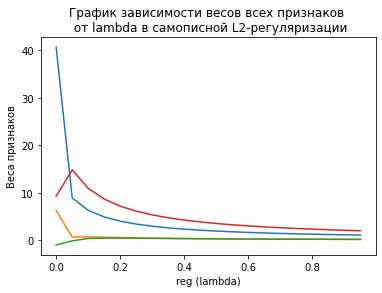

In [8]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L2-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [9]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации L1
        #dReg = reg * W # градиент регуляризации L2
        W -= eta * dQ + dReg
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.42747626 -0.50088234  0.40681144  1.39399242], error 3617.679152341959
Iter: 500, weights: [22.89291839  5.13103041 -7.10128951 19.41463174], error 40.49253582433205
Iter: 1000, weights: [27.79896679  6.06821734 -6.03343917 16.63910182], error 33.54220516200858
Iter: 1500, weights: [31.33922637  6.18879511 -4.7006086  14.61811998], error 29.82876206572569
Iter: 2000, weights: [33.99569698  6.2182749  -3.6387893  13.09966539], error 27.713976544220202
Iter: 2500, weights: [36.00017915  6.23408055 -2.83106197 11.95368127], error 26.507666718776925
Iter: 3000, weights: [37.51387235  6.24534036 -2.2204194  11.08826446], error 25.819477070623613
Iter: 3500, weights: [38.65706797  6.25377329 -1.75916841 10.43466821], error 25.426843793984442
Iter: 4000, weights: [39.52046345  6.2601348  -1.41080229  9.94104111], error 25.202817364566933
Iter: 4500, weights: [40.17254199  6.26493854 -1.14769836  9.56822974], error 25.074981051017495
Final MSE: 25.002024266818406


reg (lambda)=0.0
Iter: 0, weights: [0.25288753 1.67334682 0.13910722 2.66361764], error 3297.330543888392
Iter: 500, weights: [22.43270495  5.26872313 -7.43147041 19.68434176], error 41.1829480509722
Iter: 1000, weights: [27.43265502  6.10112339 -6.21901048 16.85168478], error 33.998524019253495
Iter: 1500, weights: [31.06315242  6.21130378 -4.83857774 14.7787506 ], error 30.089690904827943
Iter: 2000, weights: [33.78980116  6.24014039 -3.74726878 13.22013538], error 27.86216787405421
Iter: 2500, weights: [35.84749778  6.25621638 -2.9179471  12.04372312], error 26.591608593021817
Iter: 3000, weights: [37.40140344  6.26775966 -2.29106648 11.15531532], error 25.86688010270858
Iter: 3500, weights: [38.57497182  6.27641499 -1.81755918 10.48435407], error 25.453493988876215
Iter: 4000, weights: [39.46130655  6.28294535 -1.45993727  9.97761196], error 25.217697987317003
Iter: 4500, weights: [40.13070997  6.2878767  -1.18984299  9.59489548], error 25.08319962731436
Final MSE: 25.0064815798333

Iter: 1000, weights: [-0.04379132  0.26508172  0.19182578 24.03646368], error 348.4781446878836
Iter: 1500, weights: [ 0.66032049  0.0280042  -0.26009643 24.04005761], error 354.5332990337552
Iter: 2000, weights: [ 0.55290715 -0.19250793  0.11833508 24.03997994], error 329.7833590688087
Iter: 2500, weights: [ 0.43867431 -0.41186949 -0.3147949  24.0245031 ], error 337.47002961582655
Iter: 3000, weights: [ 0.31781865  0.17579232  0.06726227 24.00849719], error 335.86865515262974
Iter: 3500, weights: [ 0.22629897 -0.08362773 -0.39439331 24.01211677], error 341.4400491643888
Iter: 4000, weights: [ 0.12140209 -0.3063523  -0.02611145 24.01412922], error 342.5625040325698
Iter: 4500, weights: [ 0.02665292  0.25844585 -0.46565137 24.02823971], error 348.1883297135749
Final MSE: 344.4305314901715
reg (lambda)=0.45
Iter: 0, weights: [0.84091596 0.53438085 1.00418607 2.46941166], error 3302.335977642094
Iter: 500, weights: [ 0.31443075 -0.4175728  -0.1647517  23.29563482], error 363.3238851871047

Iter: 3500, weights: [ 0.56459962 -0.69486295 -0.4123885  18.15802082], error 668.2346960917096
Iter: 4000, weights: [ 0.27181336  0.57288667 -0.32466791 18.16220358], error 684.4231048474106
Iter: 4500, weights: [ 0.04949138 -0.05008053 -0.4652295  18.12277675], error 698.6303495403465
Final MSE: 710.1752480951859
reg (lambda)=0.8500000000000001
Iter: 0, weights: [ 1.89326855 -0.01550102  0.90085819  1.22036538], error 3150.712681036638
Iter: 500, weights: [ 0.59744619 -0.31227469 -0.81236062 17.46613003], error 718.5479906893654
Iter: 1000, weights: [ 0.01868742 -0.06736503 -0.89487717 17.43763786], error 753.313964467215
Iter: 1500, weights: [ 1.22675415  0.08936689  0.61529307 17.48324023], error 781.9456252533515
Iter: 2000, weights: [ 0.60538102  0.48660275  0.63386797 17.45942173], error 720.6916745712214
Iter: 2500, weights: [1.08840650e-02 7.85844880e-01 5.84242525e-01 1.74303578e+01], error 755.9710668302421
Iter: 3000, weights: [ 1.2084383  -0.77174087  0.39882407 17.4587181

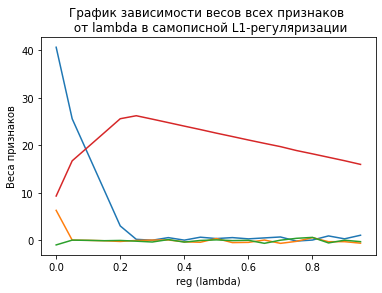

In [11]:
W_list = []
reg_list = []

for reg in np.arange(0, 1, 0.05):
    print(f'reg (lambda)={reg}')
    W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=reg)
    W_list.append(W)
    reg_list.append(reg)

plt.plot(reg_list, W_list)
plt.title('График зависимости весов всех признаков \n от lambda в самописной L1-регуляризации')
#plt.xticks(np.arange(0, 101, 10))
plt.xlabel('reg (lambda)')
plt.ylabel('Веса признаков');


3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

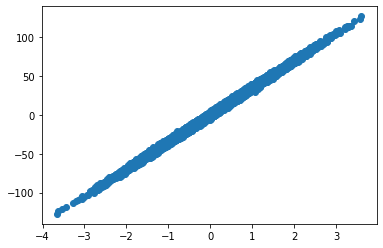

array(34.77075996)

In [89]:
# sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0,
#          effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y, coef = make_regression(n_samples=10000, n_features=1, noise=1.8, coef=True)
# plot regression dataset
pyplot.scatter(X, y)
pyplot.show()
coef

In [67]:
# градиентный спуск
def gradient_descent(X, y, iterations, eta):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    global err_list_gd
    err_list_gd = []
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        err_list_gd.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [91]:
gradient_descent(X, y, iterations=50000, eta=1e-4)

Iter: 0, weights: [-0.38254725], error 1228.3191659401975
Iter: 5000, weights: [21.72266198], error 171.9968097799661
Iter: 10000, weights: [29.9268535], error 26.491516976272738
Iter: 15000, weights: [32.97178095], error 6.4485915279763155
Iter: 20000, weights: [34.10188417], error 3.6877375907388625
Iter: 25000, weights: [34.52131395], error 3.3074380939201524
Iter: 30000, weights: [34.67698234], error 3.2550529585351233
Iter: 35000, weights: [34.73475756], error 3.24783706045412
Iter: 40000, weights: [34.75620042], error 3.2468430917503452
Iter: 45000, weights: [34.76415879], error 3.2467061754894835
Final MSE: 3.246687315677882


array([34.76711213])

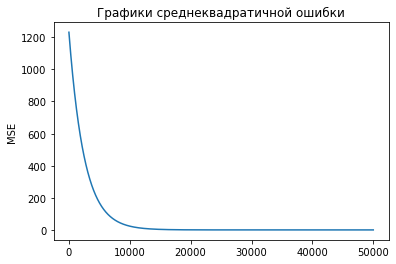

In [92]:
plt.plot(err_list_gd)
plt.title('Графики среднеквадратичной ошибки')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
plt.ylabel('MSE');

In [71]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    global err_list_sgd
    err_list_sgd = []
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            err_list_sgd.append(err)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [102]:
stohastic_gradient_descent(X, y, iterations=50000, batch_size=100, eta=1e-2)

amount of batches is 100
Iter: 0, weights: [30.00071924], error 32.24037948979352
Iter: 5000, weights: [34.7641793], error 3.485543494807985
Iter: 10000, weights: [34.7641793], error 3.485543494807985
Iter: 15000, weights: [34.7641793], error 3.485543494807985
Iter: 20000, weights: [34.7641793], error 3.485543494807985
Iter: 25000, weights: [34.7641793], error 3.485543494807985
Iter: 30000, weights: [34.7641793], error 3.485543494807985
Iter: 35000, weights: [34.7641793], error 3.485543494807985
Iter: 40000, weights: [34.7641793], error 3.485543494807985
Iter: 45000, weights: [34.7641793], error 3.485543494807985
Final MSE: 3.2467059762208477


array([34.7641793])

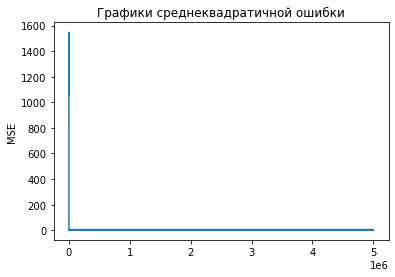

In [104]:
plt.plot(err_list_sgd)
plt.title('Графики среднеквадратичной ошибки')
#plt.xticks(np.arange(0, 101, 10))
#plt.xlabel('reg (lambda)')
plt.ylabel('MSE');

Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация